## Chapter 9: Pointers

A computer's memory consists of sequential storage locations, each with an address.  
Programs and OSs use the computers memory. When you declare a variable, the compiler sets aside a memory address to store said variable.  

#### Creating a pointer

The address of a variable is a number that can be trated as any other number in C.

### Pointer and variables

In [14]:
//A pointer declaration takes the following form

#include <stdio.h>

int v1 = 2;
int *ptr;
//the * operator indicates ptrname is a pointer

int main()
{
    ptr = &v1; //initializing ptr to point to v1
    printf("Direct access to v1 = %d", v1);
    printf("\nIndirect access to v1 = %d", *ptr);
    printf("\nAddress of v1, &v1 = %p", &v1);
    printf("\nAddress of v1, ptr = %p\n", ptr);
    
    return 0;
}

Direct access to v1 = 2
Indirect access to v1 = 2
Address of v1, &v1 = 0x7f75370720c0
Address of v1, ptr = 0x7f75370720c0


Pointers must be initialized with the same type as the variable they point to. Since different variables occupy different amounts of memory, pointers point to the first address of the first byte of memory that the variable uses.

### Arrays

An array name without brackets is a pointer to it's first element. In other words, if you declare data[], data is equivalent to typing &data[0].  
So the value of data doesn't change during the duration of the program. But pointer variables (as declared in the example before) can be changed (by assigning other varibles addresses to ir).  
Let's see an example of how the elements of an array are stored in consecutive memory addresses.

In [13]:
#include <stdio.h>

int v[2], *a, *p1, *p2;

int main()
{
    v[0] = 1, v[1] = 2;
    a = v, p1 = &v[0], p2 = &v[1];
    
    printf("%d, %d\n", v[0], v[1]);
    printf("%d, %d\n\n", *p1, *p2);
    printf("%p, %p, %p\n", v, &v[0], &v[1]);
    printf("%p, %p, %p\n", a, p1, p2);
    
    return 0;
}

1, 2
1, 2

0x7f0b691e3908, 0x7f0b691e3908, 0x7f0b691e390c
0x7f0b691e3908, 0x7f0b691e3908, 0x7f0b691e390c


In [12]:
#include <stdio.h>

int i[10], x;
float f[10];
double d[10];
int main()
{
    printf("\t\tInteger\t\tFloat\t\tDouble");
    printf("\n================================\
==================");
    printf("======================");
    
    for (x = 0; x < 10; x++)
    printf("\nElement %d:\t%p\t%p\t%p", x, &i[x],
    &f[x], &d[x]);
    printf("\n================================\
==================");
    printf("======================\n");
    
    return 0;
}

		Integer		Float		Double
Element 0:	0x7f0e4534a9c0	0x7f0e4534a980	0x7f0e4534a920
Element 1:	0x7f0e4534a9c4	0x7f0e4534a984	0x7f0e4534a928
Element 2:	0x7f0e4534a9c8	0x7f0e4534a988	0x7f0e4534a930
Element 3:	0x7f0e4534a9cc	0x7f0e4534a98c	0x7f0e4534a938
Element 4:	0x7f0e4534a9d0	0x7f0e4534a990	0x7f0e4534a940
Element 5:	0x7f0e4534a9d4	0x7f0e4534a994	0x7f0e4534a948
Element 6:	0x7f0e4534a9d8	0x7f0e4534a998	0x7f0e4534a950
Element 7:	0x7f0e4534a9dc	0x7f0e4534a99c	0x7f0e4534a958
Element 8:	0x7f0e4534a9e0	0x7f0e4534a9a0	0x7f0e4534a960
Element 9:	0x7f0e4534a9e4	0x7f0e4534a9a4	0x7f0e4534a968


#### Pointer arithmetic

In [9]:
/* Demonstrates using pointer arithmetic to access */
/* array elements with pointer notation. */

#include <stdio.h>
#define MAX 10

/* Declare and initialize an integer array. */
int i_array[MAX] = { 0,1,2,3,4,5,6,7,8,9 };

/* Declare a pointer to int and an int variable. */
int *i_ptr, count;

/* Declare and initialize a float array. */
float f_array[MAX] = { .0, .1, .2, .3, .4, .5, .6, .7, .8, .9 };

/* Declare a pointer to float. */
float *f_ptr;

int main()
{
    /* Initialize the pointers. */
    i_ptr = i_array;
    f_ptr = f_array;
    /* Print the array elements. */
    for (count = 0; count < MAX; count++)
    {
        printf("\n%d\t\t%f\n", *i_ptr, *f_ptr);
        printf("%p\t%p", i_ptr++, f_ptr++);
    }
    
    return 0;
}


0		0.000000
0x7fa26a7270e0	0x7fa26a727120
1		0.100000
0x7fa26a7270e4	0x7fa26a727124
2		0.200000
0x7fa26a7270e8	0x7fa26a727128
3		0.300000
0x7fa26a7270ec	0x7fa26a72712c
4		0.400000
0x7fa26a7270f0	0x7fa26a727130
5		0.500000
0x7fa26a7270f4	0x7fa26a727134
6		0.600000
0x7fa26a7270f8	0x7fa26a727138
7		0.700000
0x7fa26a7270fc	0x7fa26a72713c
8		0.800000
0x7fa26a727100	0x7fa26a727140
9		0.900000
0x7fa26a727104	0x7fa26a727144

Other pointers manipulations include subscracting pointer and making logical comparasions with them.

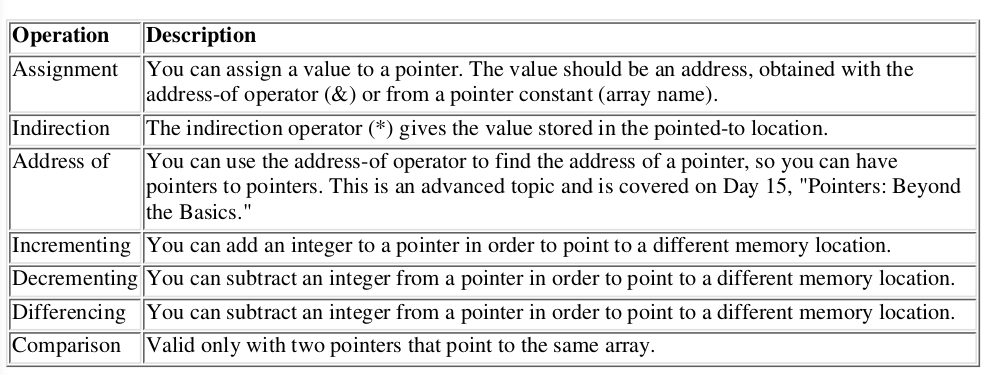

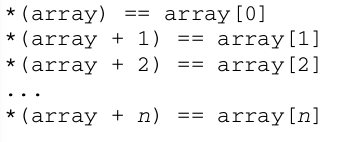

### Passing arrays to functions

The only way to use an array as the argument of a function is by the means of a pointer. The argument of a function can only be a single numeric value, so if we pass the pointer of an array to a function, the function now knows the address of the first element of the array.

In [11]:
//Passing an array to a function
#include <stdio.h>

#define MAX 10

int arr[MAX], i;

int largest(int x[], int y);

int main()
{
    for (i = 0; i < MAX; i++)
    {
        printf("Enter an integer value: ");
        scanf("%d\n", &arr[i]);
    }
    
    printf("\nLargest value = %d\n", largest(arr, MAX));
    
    return 0;
}

//Function largest
int largest(int x[], int y)
{
    int i, biggest = *arr;
    
    for (i = 0; i < y; i ++)
    {
        if (x[i] > biggest)
            biggest = x[i];
    }
    
    return biggest;
}

Enter an integer value: 10
Enter an integer value: 20
Enter an integer value: 50
Enter an integer value: 12
Enter an integer value: 420
Enter an integer value: 300
Enter an integer value: 20
Enter an integer value: 10
Enter an integer value: 50
Enter an integer value: 30

Largest value = 420


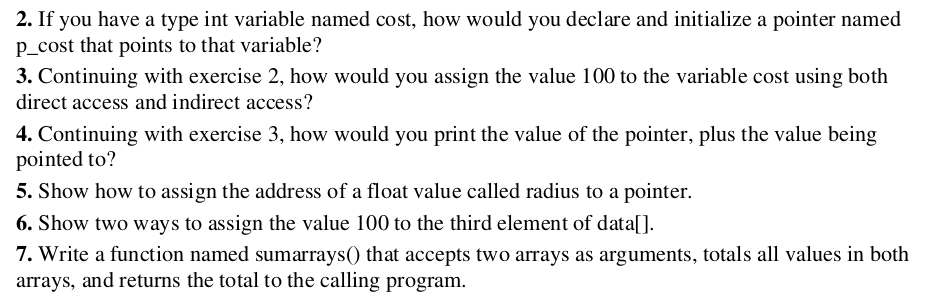

In [7]:
// 2-4
// Shows the equivalance of &x, and p_x, and, x and *p_x

#include <stdio.h>

int cost, *p_cost;

int main()
{
    p_cost = &cost;
        
    printf("Enter cost: ");
    scanf("%d", &cost);
        
    printf("*p_cost = %d", *p_cost);
    printf("\ncost = %d", cost);
    printf("\np_cost = %p", p_cost);
    printf("\n&cost = %p\n", &cost);
    
    printf("\nEnter *p_cost: ");
    scanf("%d", p_cost);

    printf("*p_cost = %d", *p_cost);
    printf("\ncost = %d", cost);
    printf("\np_cost = %p", p_cost);
    printf("\n&cost = %p", &cost);
    
    
    return 0;
}

Enter cost: 10
*p_cost = 10
cost = 10
p_cost = 0x7f04caf0a928
&cost = 0x7f04caf0a928

Enter *p_cost: 20
*p_cost = 20
cost = 20
p_cost = 0x7f04caf0a928
&cost = 0x7f04caf0a928

In [13]:
//7
//Function that accepts two arrays as arguments and prints the total sum

#include <stdio.h>

//Sizes of the arrays
#define M1 5
#define M2 10

int a1[M1], a2[M2];

void assignArr(int x[], int y[]);
int sumArr(int x[], int y[]);

int main()
{
    //Generate values for a1 and a2 according to assignArr
    assignArr(a1, a2);
    
    //Use the function
    printf("Total of elements = %d", sumArr(a1, a2));
    
    return 0;
}

void assignArr(int x[], int y[])
{
    for (int i = 0; i < M1; i++)
    {
        x[i] = i - 10;
    }
    
    for (int i = 0; i < M2; i++)
    {
        y[M2-1 - i] = 2*i + 1;
    }
}

int sumArr(int x[], int y[])
{
    int sum = 0;
    
    //Add fisrt array to sum
    for (int i = 0; i < M1; i++)
    {
        sum += x[i];
    }
    
    //Add second array to sum
    for (int i = 0; i < M2; i++)
    {
        sum += y[i];
    }
    
    return sum;
}

Total of elements = 60

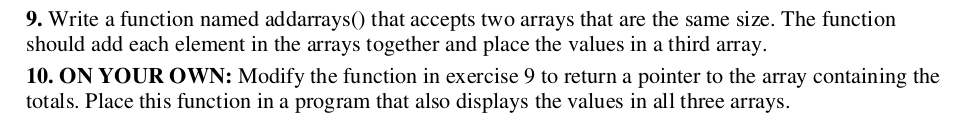

In [14]:
// 9-10

#include <stdio.h>

#define MAX 6

void addArr(int x[], int y[], int sum[]);
void assignArr(int x[], int y[]);

int a1[MAX], a2[MAX], sumArr[MAX];

int main()
{
    //Generate the values for a1 and a2
    assignArr(a1, a2);
    
    //Add arrays to sumArr[]
    addArr(a1, a2, sumArr);
    
    //Print the results
    printf("Format:\t\ta1[i] + a2[i] = sum[i]\n\n");
    for (int i = 0; i < MAX; i++)
    {
        printf("%d + %d = %d\n", a1[i], a2[i], sumArr[i]);
    }
    
    return 0;
}

//Functions
void assignArr(int x[], int y[])
{
    for (int i = 0; i < MAX; i++)
    {
        x[i] = i;
        y[i] = -2*i + 2;
    }
}

void addArr(int x[], int y[], int sum[])
{
    for (int i = 0; i < MAX; i++)
        sum[i] = x[i] + y[i];
}

Format:		a1[i] + a2[i] = sum[i]

0 + 2 = 2
1 + 0 = 1
2 + -2 = 0
3 + -4 = -1
4 + -6 = -2
5 + -8 = -3


## Chapter 10: Strings

Declaring char variables. Examples:  
```
char a, b, c;  
char code = 'x';  
code = '!';
```

In [15]:
// Demonstrates the nature of char variables

#include <stdio.h>

// Initialize two char variables

char c1 = 'a';
char c2 = 90;

int main()
{
    printf("As a character, c1 is %c\n", c1);
    printf("As a number, c1 is %d\n\n", c1);
    
    printf("As a character, c2 is %c\n", c2);
    printf("As a number, c2 is %d\n\n", c2);
    
    return 0;
}

As a character, c1 is a
As a number, c1 is 97

As a character, c2 is Z
As a number, c2 is 90



In [16]:
#include <stdio.h>

unsigned char x;

int main()
{
    for (x = 42; x < 69; x++)
    {
        printf("ASCII code %d is character %c\n", x, x);
    }
    
    return 0;
}

ASCII code 42 is character *
ASCII code 43 is character +
ASCII code 44 is character ,
ASCII code 45 is character -
ASCII code 46 is character .
ASCII code 47 is character /
ASCII code 48 is character 0
ASCII code 49 is character 1
ASCII code 50 is character 2
ASCII code 51 is character 3
ASCII code 52 is character 4
ASCII code 53 is character 5
ASCII code 54 is character 6
ASCII code 55 is character 7
ASCII code 56 is character 8
ASCII code 57 is character 9
ASCII code 58 is character :
ASCII code 59 is character ;
ASCII code 60 is character <
ASCII code 61 is character =
ASCII code 62 is character >
ASCII code 63 is character ?
ASCII code 64 is character @
ASCII code 65 is character A
ASCII code 66 is character B
ASCII code 67 is character C
ASCII code 68 is character D


### Using strings

#### Arrays of characters

These can be initialized as individual elements:  
char string[10] = {'A', 'l', 'a', 'b', 'a', 'm', 'a', '\0'};  
// Strings require a terminating null character
Or we can use double quotes:  
char string[10] = "Alabama";  
If you don't specify the size of the array the compiler calculates the size for you:  
char string[] = "Alabama";

#### Pointers

Writing:  
char \*message = "sms";  
is equivalent to writing:  
chr message[] = "sms";

### The malloc() function

It is a memory allocation function, when called, you pass the number of bytes needed and malloc() finds and reserves them, returning the address of the first byte in the block with a type void (compatible with all types).

In [6]:
// Example 1

#include <stdio.h>
#include <stdlib.h>

int main()
{
    // Allocate memory for 100 characters
    
    char *str;
    
    if ((str = (char *) malloc(100)) == NULL)
    {
        printf("Not enough memory to allocate buffer\n");
        exit(1);
    }
    
    printf("String was allocated!\n");
    
    return 0;
}

String was allocated!


In [5]:
// Example 2

#include <stdio.h>
#include <stdlib.h>

int main()
{
    // Allocate memory for 50 integers
        
    int *numbers;
    
    numbers = (int *) malloc(50 * sizeof(int));
    
    for (int count = 0; count < 50; count++)
    {
        numbers[count] = count + 1;
    }
    
    for (int count = 0; count < 9; count++)
    {
        printf("%d\t", *numbers++);
    }

    return 0;
}

1	2	3	4	5	6	7	8	9	

In [4]:
// Example 3

#include <stdio.h>
#include <stdlib.h>

int main()
{
    // Allocate memory for 10 float values
    
    float *numbers;
    numbers = (float *) malloc(10 * sizeof(float));
    
    for (int count = 0; count < 10; count++)
    {
        numbers[count] = (count + 1) * 0.1;
    }
    
    for (int count = 0; count < 10; count++)
    {
        printf("%f\n", *numbers++);
    }
    
    return 0;
}

0.100000
0.200000
0.300000
0.400000
0.500000
0.600000
0.700000
0.800000
0.900000
1.000000


In [28]:
// Using malloc() to allocate storage for string data

#include <stdio.h>
#include <stdlib.h>

char count, *ptr, *p;

int main()
{
    // Allocate 35 bytes and test for success
    
    ptr = malloc(35 * sizeof(char));
    
    if (ptr == NULL)
    {
        puts("Memory allocation error.\n");
        exit(1);
    }
    
    // Fill the string with the ASCII code for A-Z
    
    // Pointer p is used to step through the string
    // ptr remains pointed at the start
    p = ptr;
    
    for (count = 65; count < 91; count++)
        *p++ = count;
    
    *p = '\0'; // The null character of the end
    
    puts(ptr);
    
    return 0;
}

ABCDEFGHIJKLMNOPQRSTUVWXYZ


### Displaying strings

#### The puts() function

The function takes a pointer to a string or a string literal and prints it.

In [2]:
// Demonstrates the function puts()

#include <stdio.h>

char *sms1 = "C";
char *sms2 = "is the";
char *sms3 = "best";
char *sms4 = "programming";
char *sms5 = "language";

int main()
{
    puts(sms1);
    puts(sms2);
    puts(sms3);
    puts(sms4);
    puts(sms5);
    
    return 0;
}

C
is the
best
programming
language


#### The printf() function

Strings can be printed using the printf(), using the specifier %s.

In [1]:
// Demonstrates %s in printf()

#include <stdio.h>

char *str = "Todd is sus";

int main()
{
    printf("%s", str);
    
    return 0;
}

Todd is sus

### Strings as input

The two functions that read inputs from the keyboard are gets() and scanf().

#### The gets() function

The gets() function reads all characters typed until the first new line, adding a null character at the end.

In [ ]:
// Demonstrates the use of gets()

#include <stdio.h>
#include <string.h>

// Allocate a array to hold input
char input[81];

char *mygets(char *buf, size_t size);

int main()
{
    puts("Enter some text, then press Enter: ");
    mygets(input, sizeof(input));
    printf("You entered: %s\n", input);

    return 0;
}

char *mygets(char *buf, size_t size)
{
    if (buf != NULL && size > 0) {
        if (fgets(buf, size, stdin)) {
            buf[strcspn(buf, "\n")] = '\0';
            return buf;
        }
        *buf = '\0';  /* clear buffer at end of file */
    }
    return NULL;
}

The gets() function isn't used since C11

#### The scanf() function

Using the %s specifier, the function scanf() can read strings. It reads the string until it meets whitespace. If you use %ns, where n is an integer, then scanf reads n characters or until it meets whitespace.

In [18]:
// Demonstrates scanf() function

#include <stdio.h>

char lname[81], fname[81];
int count, id_num;

int main()
{
    puts("Enter last name, first name, ID number seperated");
    puts("by spaces, then press Enter");
    
    count = scanf("%s%s%d", lname, fname, &id_num);
    
    printf("%d items entered, %s %s %d \n", \
count, fname, lname, id_num);
    
    return 0;
}

Enter last name, first name, ID number seperated
by spaces, then press Enter
Friend Rodrigo 19
3 items entered, Rodrigo Friend 19 


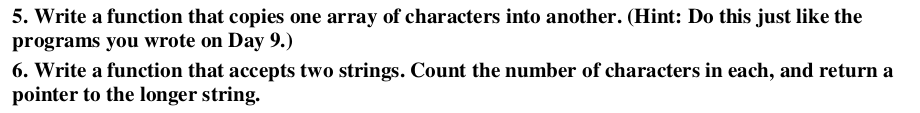

In [35]:
// 5

#include <stdio.h>
#include <stdlib.h>

char *str, *copy;

int main()
{
    str = malloc(81 * sizeof(char));
    
    scanf("%81[^\n]", str);
    
    copy = str;
    
    puts(copy);
    
    return 0;
}

Hello world!
Hello world!


In [6]:
// 6

#include <stdio.h>
#include <stdlib.h>

char *s1, *s2; // Strings
int count(char str[]); // Func to count chars in strings

int main()
{
    s1 = malloc(81 * sizeof(char));
    s2 = malloc(81 * sizeof(char));

    // Get the strings from user
    
    puts("Enter string 1: ");
    scanf("%81[^\n]", s1);
    
    puts("Enter string 2: ");
    scanf(" %81[^\n]", s2);
    
    if (count(s1) > count(s2))
    {
        printf("String 1 is larger, located in the address %p",\
s1);
    }
    
    else if (count(s1) < count(s2))
    {
        printf("String 2 is larger, located in the address %p",\
s2);
    }
    
    else
        puts("Strings are the same size");
    
    return 0;
}

int count(char str[])
{
    int i = 0;
    int chars = 0;
    
    while(str[i] != '\0' && i < 81)
    {
        chars++;
        i++;
    }

    return chars;
}

Enter string 1: 
Hello world!
Enter string 2: 
Hello Rodrigo
String 2 is larger, located in the address 0x5576f45e28e0

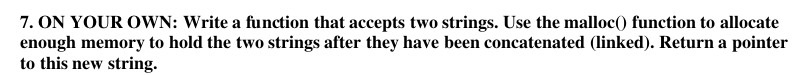

In [2]:
// 7

#include <stdio.h>
#include <stdlib.h>
#include <string.h>

char *s1, *s2, *str; //input s1 and s2, concatenate to str

int main()
{
    s1 = malloc(40 * sizeof(char));
    s2 = malloc(40 * sizeof(char));
    str = malloc(81 * sizeof(char));

    // Get the strings from user
    
    puts("Enter string 1: ");
    scanf("%40[^\n]", s1);
    
    puts("Enter string 2: ");
    scanf(" %40[^\n]", s2);
        
    strcat(str, s1);
    strcat(str, s2);
    
    puts("Both strings:");
    puts(str);
    
    return 0;
}

Enter string 1: 
Hello 
Enter string 2: 
world
Both strings:
Hello world
